# DATA INSPECTION

Once all periodograms have been calculated for both RV time series and TESS light curves, we make a quick inspection of the resulting input data and results.

## Modules and configuration

### Modules

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import mode, normaltest, ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

### Configuration

In [2]:
INPUT_FILE = "../data/CARM_VIS_objects_with_PG.csv"

IMAGE_FOLDER = "./img/"

ALPHA = 1e-3 # Significance threshold for statistical tests

### Functions

In [3]:
def draw_hist(d1, d1_label, fig_filename=None):
    '''Draws an histogram of the values passed. It also calulates the statistics
    and tests the goodness of fit by a Gaussian distribution'''
    # Plots and saves the figure
    kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    plt.title(d1_label + " values distribution", fontsize=16)
    plt.grid(axis='x', alpha=0.75)
    plt.xlabel(d1_label, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    sns.distplot(d1, label=d1_label, **kwargs)
    #sns.histplot(d1, label=d1_label)
    #plt.xlim(0,100)
    #plt.legend(loc='upper right');
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='png')
    # Display basic statistics:
    print(pd.Series(d1).describe())
    # Perform the normaltest (D'Agostino and Pearson) for Gaussian distribution fit:
    k2, p = normaltest(d1)
    alpha = ALPHA
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("***This distribution does NOT come from a Gaussian distribution" \
              "(with significance level = %.6f)" %(1.0 - alpha))
    else:
        print("This distribution MIGHT COME come from Gaussian distribution" \
              "(with significance level = %.6f)" %(1.0 - alpha))

In [4]:
def compare_dist(d1, d2, d1_label, d2_label, varname=None, fig_title=None, fig_filename=None):
    '''Plots and saves overlapped histograms.
    It also shows the result of a t-Student test.'''
    # Plots and saves the figure
    kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    if fig_title is None:
        plt.title("Comparison of distributions", fontsize=16)
    else:
        plt.title(fig_title, fontsize=16)
    plt.grid(axis='x', alpha=0.75)
    if varname is None:
        plt.xlabel("%s / %s" %(d1_label, d2_label), fontsize=12)
    else:
        plt.xlabel(varname, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    sns.distplot(d1, label=d1_label, **kwargs)
    sns.distplot(d2, label=d2_label, **kwargs)
    #plt.xlim(0,100)
    plt.legend(loc='upper right');
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='png')
    # Perform the t-Student test (as independent samples):
    stat, p = ttest_ind(d1, d2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('***Probably different distributions')

##  Load the CARM_VIS objects

In [5]:
df = pd.read_csv(INPUT_FILE, sep=',', decimal='.')
df.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_T0_PG_TESS,WF_e_T0_PG_TESS,WF_offset_PG_TESS,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS
0,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,NaN,NaN,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000997,NaN,NaN
1,J23556-061,GJ 912,AB,912,358.913617,-6.144283,23:55:39.78,-06:08:33.4,88.129933,-65.175491,...,NaN,NaN,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000998,NaN,NaN
2,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,1764.689208,0.027575,999.999756,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...
3,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,1353.926624,0.036481,1000.000122,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...
4,J23492+024,BR Psc,-,908,357.306604,2.396918,23:49:12.53,+02:24:04.4,93.567467,-56.885396,...,NaN,NaN,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.001995,NaN,NaN


In [6]:
print(list(df.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

## Data statistics

### Overall data statistics for RV curves

In [7]:
rv_main_vars = df[['Karmn', 'n_RV', 'Ps_RV', 'fs_RV', 'wmean_RV', 'wrms_RV',
                   'rms_PG_RV', 'f_PG_RV', 'Pd_PG_RV', 'FAP_PG_RV']] \
    .copy()

In [8]:
rv_main_vars.describe()

,n_RV,Ps_RV,fs_RV,wmean_RV,wrms_RV,rms_PG_RV,f_PG_RV,Pd_PG_RV,FAP_PG_RV
count,387.000000,387.000000,387.000000,3.870000e+02,387.000000,3.870000e+02,387.000000,387.000000,3.870000e+02
mean,51.979328,15.805441,1.431340,-1.651589e+00,361.871528,7.719652e+01,134.312746,0.054413,1.995298e-01
std,76.124792,28.078791,17.256361,4.359460e+01,2564.902866,4.336978e+02,90.245640,0.108212,2.786815e-01
min,4.000000,0.003176,0.003251,-4.853787e+02,0.666710,3.687434e-07,2.523000,0.003474,8.912285e-23
25%,14.000000,3.294005,0.054617,-1.322098e-01,2.684700,1.213286e+00,52.477050,0.004725,1.080136e-02
50%,30.000000,8.830573,0.113243,-1.110223e-16,4.015005,2.538584e+00,143.029100,0.006992,6.585773e-02
75%,60.000000,18.311180,0.304807,2.498002e-16,11.644566,5.282460e+00,211.649700,0.019058,2.628137e-01
max,768.000000,307.604864,314.907497,5.132076e+02,31233.301918,5.173615e+03,287.875900,0.396354,1.000000e+00


**OBSERVATION:** RV times series values (Minimum - Median - Maximum) for the whole sample:
- `n_RV`, number of RV points: (4 - 30 - 768)
- `Ps_RV`, sampling period: (0.0032 - 8.83 - 308) days
- `rms_PG_RV`, RMS value of the RV time series, with outliers already discarded: (3.69e-07 / 2.54 / 5174) m/s
- `Pd_PG_RV`, detected periodogram periods: (0.0035 - 0.0070 - 0.3963) d = (5 min - 10 min - 9.5 h)
- `FAP_PG_RV`, False Alarm Probability for calculated peak: (8.91e-23 - 0.066 - 1.00)

#### Number of points analysis (RV - Overall)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    387.000000
mean      51.979328
std       76.124792
min        4.000000
25%       14.000000
50%       30.000000
75%       60.000000
max      768.000000
Name: n_RV, dtype: float64
p = nan
This distribution MIGHT COME come from Gaussian distribution(with significance level = 0.999000)


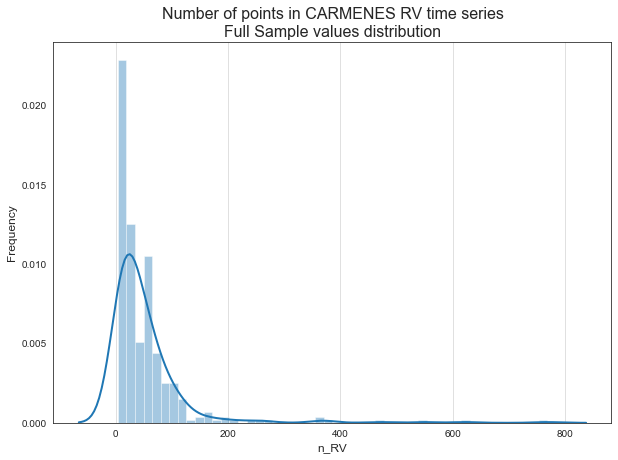

In [9]:
draw_hist(rv_main_vars['n_RV'], "Number of points in CARMENES RV time series\nFull Sample",
          fig_filename=IMAGE_FOLDER + "ETL_46_01_RV_Number_of_points_distribution.png")

In [10]:
np.nanquantile(rv_main_vars['n_RV'], q=0.95)

139.19999999999982

**OBSERVATION:**
- Most of the RV time series ($95\%$) have less than $\approx139$ points.

#### Sampling period analysis (RV - Overall)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    387.000000
mean      15.805441
std       28.078791
min        0.003176
25%        3.294005
50%        8.830573
75%       18.311180
max      307.604864
Name: Ps_RV, dtype: float64
p = nan
This distribution MIGHT COME come from Gaussian distribution(with significance level = 0.999000)


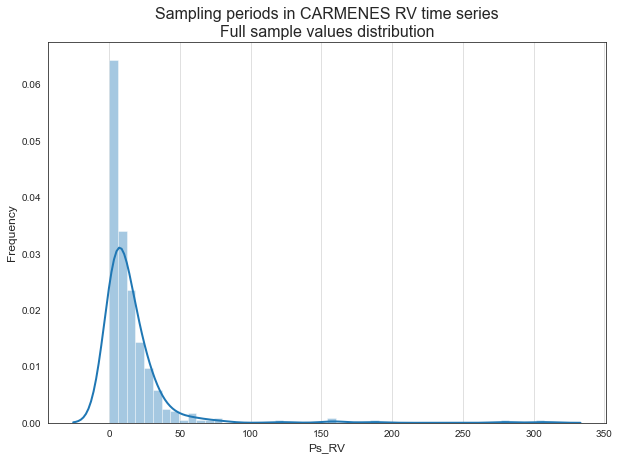

In [11]:
draw_hist(rv_main_vars['Ps_RV'], "Sampling periods in CARMENES RV time series\nFull sample",
          fig_filename=IMAGE_FOLDER + "ETL_46_02_RV_Sampling_period_distribution.png")

In [12]:
np.nanquantile(rv_main_vars['Ps_RV'], q=0.03)

0.9830872804718092

In [13]:
np.nanquantile(rv_main_vars['Ps_RV'], q=0.04)

1.0073478420823812

**OBSERVATION:**
- Most of the RV time series ($97\%$) have sampling periods greater than $\approx1$ day.

#### RMS analysis (RV - Overall)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    3.870000e+02
mean     7.719652e+01
std      4.336978e+02
min      3.687434e-07
25%      1.213286e+00
50%      2.538584e+00
75%      5.282460e+00
max      5.173615e+03
Name: rms_PG_RV, dtype: float64
p = nan
This distribution MIGHT COME come from Gaussian distribution(with significance level = 0.999000)


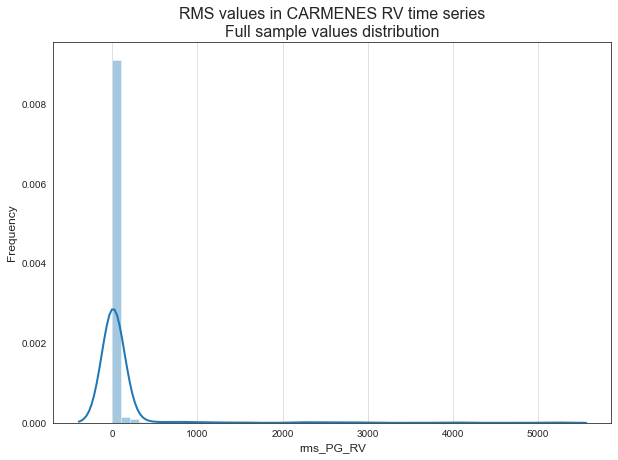

In [14]:
draw_hist(rv_main_vars['rms_PG_RV'], "RMS values in CARMENES RV time series\nFull sample",
          fig_filename=IMAGE_FOLDER + "ETL_46_03_RV_RMS_values_distribution.png")

In [15]:
np.nanquantile(rv_main_vars['rms_PG_RV'], q=0.72)

4.769560731811519

In [16]:
np.nanquantile(rv_main_vars['rms_PG_RV'], q=0.73)

5.001284517612093

**OBSERVATION:**
- $72\%$ of the time series show RMS values (outliers removed) lower than $5\;m\;s^{-1}$.

### Select objects for periodogram analysis

In [17]:
pg_df = df[(df['valid_PG_TESS'] == 1.0) & (df['valid_PG_RV'] == 1.0)].copy()
len(pg_df)

265

### PG subsample statistics for RV curves

In [18]:
pg_rv_main_vars = pg_df[['Karmn', 'n_RV', 'Ps_RV', 'fs_RV', 'wmean_RV', 'wrms_RV',
                         'rms_PG_RV', 'f_PG_RV', 'Pd_PG_RV', 'FAP_PG_RV']] \
    .copy()

In [19]:
pg_rv_main_vars.describe()

,n_RV,Ps_RV,fs_RV,wmean_RV,wrms_RV,rms_PG_RV,f_PG_RV,Pd_PG_RV,FAP_PG_RV
count,265.000000,265.000000,265.000000,2.650000e+02,265.000000,2.650000e+02,265.000000,265.000000,2.650000e+02
mean,50.301887,16.817766,1.463204,-1.782737e-01,363.805366,7.807460e+01,134.774081,0.054837,1.954754e-01
std,71.579206,32.564589,19.343713,4.364674e+01,2781.680734,4.802483e+02,91.089186,0.109417,2.676930e-01
min,4.000000,0.003176,0.003251,-4.853787e+02,0.666710,3.687434e-07,2.523000,0.003491,8.912285e-23
25%,14.000000,3.045991,0.055488,-9.268733e-02,2.627072,1.082274e+00,52.987300,0.004744,9.839303e-03
50%,30.000000,8.935142,0.111918,-5.551115e-17,4.015005,2.561934e+00,143.772600,0.006955,6.562565e-02
75%,58.000000,18.022019,0.328300,2.220446e-16,10.918993,5.200497e+00,210.803000,0.018872,2.612674e-01
max,768.000000,307.604864,314.907497,5.132076e+02,31233.301918,5.173615e+03,286.430500,0.396354,1.000000e+00


**OBSERVATION:** RV time series values (Minimum - Median - Maximum) for periodogram analysis subsample (in **bold**, the changes relative to the stats of the overall sample):
- `n_RV`, number of RV points: (4 - 30 - 768)
- `Ps_RV`, sampling period: (0.0032 - **8.93** - 308) days
- `rms_PG_RV`, RMS value of the RV time series, with outliers already discarded: (3.69e-07 / **2.56** / 5174) m/s
- `Pd_PG_RV`, detected periodogram periods: (0.0035 - 0.0070 - 0.3963) d = (5 min - 10 min - 9.5 h)
- `FAP_PG_RV`, False Alarm Probability for calculated peak: (8.91e-23 - 0.066 - 1.00)

#### Number of points analysis (RV - PG subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    265.000000
mean      50.301887
std       71.579206
min        4.000000
25%       14.000000
50%       30.000000
75%       58.000000
max      768.000000
Name: n_RV, dtype: float64
p = 6.71652e-73
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


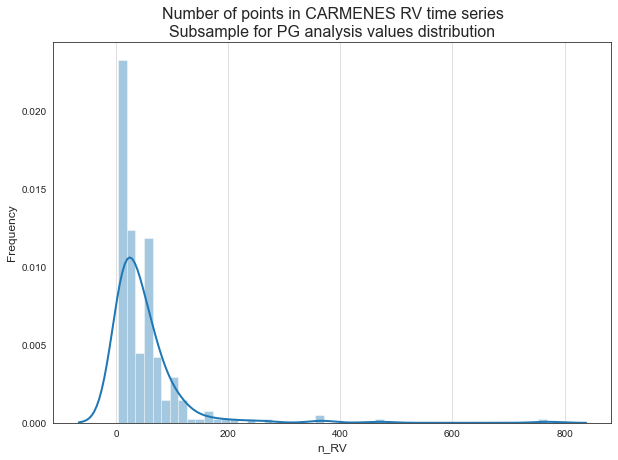

In [20]:
draw_hist(pg_rv_main_vars['n_RV'],
          "Number of points in CARMENES RV time series\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_04_PG_SUBSAMPLE_RV_Number_of_points_distribution.png")

In [21]:
np.nanquantile(pg_rv_main_vars['n_RV'], q=0.95)

127.59999999999997

**OBSERVATION:**
- Most of the RV time series ($95\%$) have less than $\approx127$ points.

#### Sampling period analysis (RV - PG subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    265.000000
mean      16.817766
std       32.564589
min        0.003176
25%        3.045991
50%        8.935142
75%       18.022019
max      307.604864
Name: Ps_RV, dtype: float64
p = 5.31346e-76
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


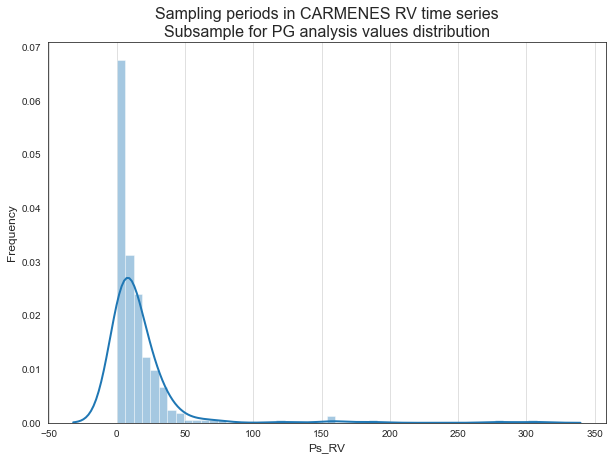

In [22]:
draw_hist(pg_rv_main_vars['Ps_RV'],
          "Sampling periods in CARMENES RV time series\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_05_PG_SUBSAMPLE_RV_Sampling_period_distribution.png")

In [23]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.03)

0.9787316022440791

In [24]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.04)

1.0052504100371151

**OBSERVATION:**
- Most of the RV time series ($97\%$) have sampling periods greater than $\approx1$ day.

#### RMS analysis (RV - PG subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2.650000e+02
mean     7.807460e+01
std      4.802483e+02
min      3.687434e-07
25%      1.082274e+00
50%      2.561934e+00
75%      5.200497e+00
max      5.173615e+03
Name: rms_PG_RV, dtype: float64
p = 3.41428e-91
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


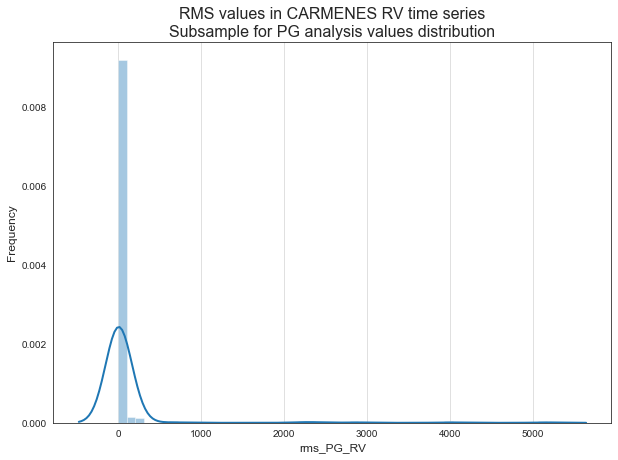

In [25]:
draw_hist(pg_rv_main_vars['rms_PG_RV'],
          "RMS values in CARMENES RV time series\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_06_PG_SUBSAMPLE_RV_RMS_values_distribution.png")

In [26]:
np.nanquantile(pg_rv_main_vars['rms_PG_RV'], q=0.72)

4.868921368014436

In [27]:
np.nanquantile(pg_rv_main_vars['rms_PG_RV'], q=0.73)

5.044396944919181

**OBSERVATION:**
- $72\%$ of the time series show RMS values (outliers removed) lower than $5\;m\;s^{-1}$.

### PG subsample statistics for TESS curves

In [28]:
pg_tess_main_vars = pg_df[['Karmn', 'n_TESS', 'Ps_TESS', 'fs_TESS', 'wmean_TESS', 'wrms_TESS',
                           'rms_PG_TESS', 'f_PG_TESS', 'Pd_PG_TESS', 'FAP_PG_TESS']] \
    .copy()

In [29]:
pg_tess_main_vars.describe()

,n_TESS,Ps_TESS,fs_TESS,wmean_TESS,wrms_TESS,rms_PG_TESS,f_PG_TESS,Pd_PG_TESS,FAP_PG_TESS
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,2.650000e+02
mean,14370.943396,0.002940,660.588762,53863.121199,130.661291,128.196854,60.284785,0.183636,1.871869e-01
std,4453.805052,0.005167,188.930553,99482.882105,581.231128,579.683850,87.550680,0.153104,2.868329e-01
min,833.000000,0.001389,47.999082,-315455.875000,2.188334,2.057648,2.420000,0.003473,0.000000e+00
25%,13420.000000,0.001389,719.990407,8400.630859,16.650694,16.500482,3.051000,0.010417,3.369252e-09
50%,15602.000000,0.001389,719.998141,21288.244141,29.356222,28.108767,4.811000,0.207857,3.302558e-02
75%,16941.000000,0.001389,720.007062,59913.949219,68.504135,67.758607,96.000000,0.327761,2.577993e-01
max,18711.000000,0.020834,720.017204,661204.500000,8249.875000,8248.891468,287.916000,0.413223,1.000000e+00


**OBSERVATION:** TESS light curves values (Minimum - Median - Maximum) for periodogram analysis subsample:
- `n_TESS`, number of RV points: (833 - 15602 - 18711)
- `Ps_TESS`, sampling period: (0.0014 - 0.0014 - 0.0208) days
- `rms_PG_TESS`, RMS value of the TESS light curves, with outliers already discarded: (2.06 / 28.1 / 8249) e/s
- `Pd_PG_TESS`, detected periodogram periods: (0.0035 - 0.0070 - 0.3963) d (0.0035 - 0.2079 - 0.4132) d = (5 min - 5.0 h - 9.9 h)
- `FAP_PG_TESS`, False Alarm Probability for calculated peak: (0.000 - 0.033 - 1.00)

#### Number of points analysis (TESS - PG subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      265.000000
mean     14370.943396
std       4453.805052
min        833.000000
25%      13420.000000
50%      15602.000000
75%      16941.000000
max      18711.000000
Name: n_TESS, dtype: float64
p = 5.84446e-27
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


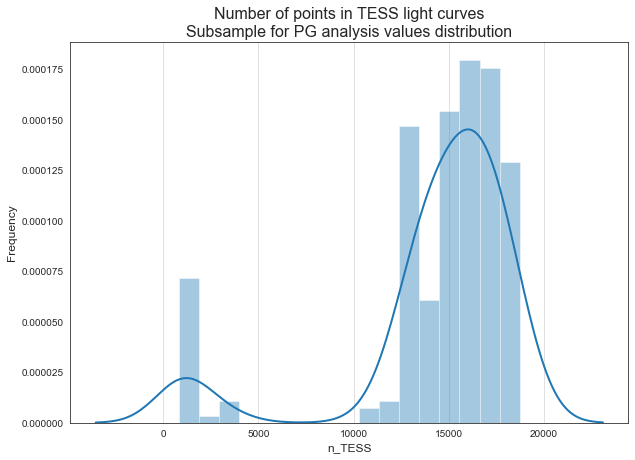

In [30]:
draw_hist(pg_tess_main_vars['n_TESS'],
          "Number of points in TESS light curves\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_07_PG_SUBSAMPLE_TESS_Number_of_points_distribution.png")

In [31]:
np.nanquantile(pg_tess_main_vars['n_TESS'], q=0.95)

18424.0

**OBSERVATION:**
- Most of the TESS light curves ($95\%$) have at least $18424$ points.

#### Sampling period analysis (TESS - PG subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    265.000000
mean       0.002940
std        0.005167
min        0.001389
25%        0.001389
50%        0.001389
75%        0.001389
max        0.020834
Name: Ps_TESS, dtype: float64
p = 1.50477e-41
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


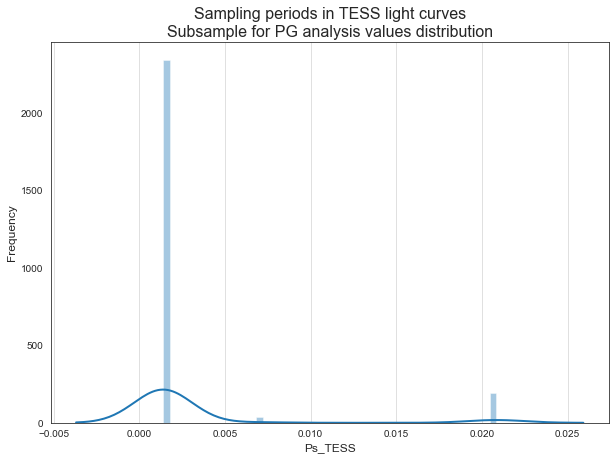

In [32]:
draw_hist(pg_tess_main_vars['Ps_TESS'],
          "Sampling periods in TESS light curves\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_08_PG_SUBSAMPLE_TESS_Sampling_period_distribution.png")

In [33]:
np.nanquantile(pg_tess_main_vars['Ps_TESS'], q=0.90)

0.00138891888327628

In [34]:
np.nanquantile(pg_tess_main_vars['Ps_TESS'], q=0.91)

0.0027222313587571788

In [35]:
len(pg_tess_main_vars[pg_tess_main_vars['Ps_TESS'] < 0.0014]) / len(pg_tess_main_vars)

0.909433962264151

**OBSERVATION:**
- Most of the TESS time series ($90\%$) have sampling periods equal to $\approx0.001389\;day$ ($\approx2\;min$).

#### RMS analysis (RV - PG subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     265.000000
mean      128.196854
std       579.683850
min         2.057648
25%        16.500482
50%        28.108767
75%        67.758607
max      8248.891468
Name: rms_PG_TESS, dtype: float64
p = 1.97225e-112
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


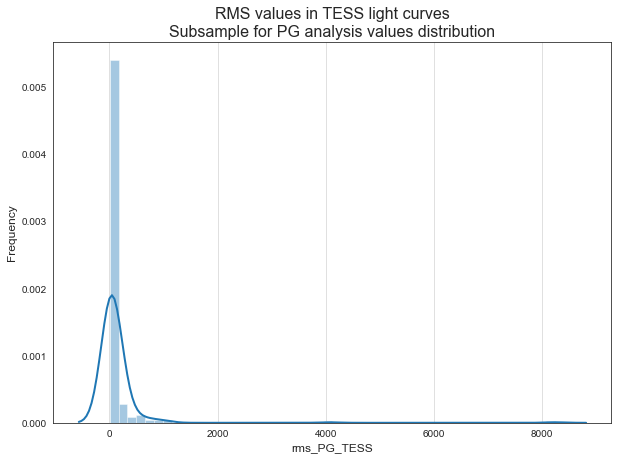

In [36]:
draw_hist(pg_tess_main_vars['rms_PG_TESS'],
          "RMS values in TESS light curves\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_09_PG_SUBSAMPLE_TESS_RMS_values_distribution.png")

In [37]:
np.nanquantile(pg_tess_main_vars['rms_PG_TESS'], q=0.76)

69.21360295584196

In [38]:
np.nanquantile(pg_tess_main_vars['rms_PG_TESS'], q=0.77)

72.4984194994649

**OBSERVATION:**
- $76\%$ of the light curves show RMS values (outliers removed) lower than $70\;e\;s^{-1}$.

### Select objects for Machine Learning (ML) analysis

In [39]:
ml_df = df[df['rms_PG_RV'] <= 5.0].copy()
len(ml_df)

282

### ML subsample statistics for RV curves

In [40]:
ml_rv_main_vars = ml_df[['Karmn', 'n_RV', 'Ps_RV', 'fs_RV', 'wmean_RV', 'wrms_RV',
                         'rms_PG_RV', 'f_PG_RV', 'Pd_PG_RV', 'FAP_PG_RV']] \
    .copy()

In [41]:
ml_rv_main_vars.describe()

,n_RV,Ps_RV,fs_RV,wmean_RV,wrms_RV,rms_PG_RV,f_PG_RV,Pd_PG_RV,FAP_PG_RV
count,282.000000,282.000000,282.000000,2.820000e+02,282.000000,2.820000e+02,282.000000,282.000000,2.820000e+02
mean,55.315603,18.008678,1.355029,-1.222530e-01,6.779567,1.832941e+00,149.239405,0.031549,2.068832e-01
std,86.399612,32.018035,18.746231,5.487557e-01,25.301545,1.278094e+00,85.793741,0.076353,2.738776e-01
min,4.000000,0.003176,0.003251,-5.685637e+00,0.666710,3.687434e-07,2.644500,0.003474,8.912285e-23
25%,14.000000,3.936369,0.047639,-1.190748e-01,2.450216,7.371487e-01,76.169625,0.004432,2.002628e-02
50%,28.500000,9.949019,0.100512,-1.110223e-16,3.122069,1.675366e+00,158.263300,0.006319,7.218240e-02
75%,64.000000,20.991051,0.254041,1.387779e-16,4.451724,2.783865e+00,225.657150,0.013129,2.737257e-01
max,768.000000,307.604864,314.907497,1.539758e+00,376.801447,4.976458e+00,287.875900,0.378143,9.999997e-01


**OBSERVATION:** RV time series values (Minimum - Median - Maximum) for ML analysis subsample (in **bold**, the changes relative to the overall sample stats):
- `n_RV`, number of RV points: (4 - **29** - 768)
- `Ps_RV`, sampling period: (0.0032 - **9.94** - 308) days
- `rms_PG_RV`, RMS value of the RV time series, with outliers already discarded: (3.69e-07 / **1.67** / **4.97**) m/s
- `Pd_PG_RV`, detected periodogram periods: (0.0035 - **0.0063** - **0.3781**) d = (5 min - **9 min** - **9.1** h)
- `FAP_PG_RV`, False Alarm Probability for calculated peak: (8.91e-23 - 0.066 - 1.00)

#### Number of points analysis (RV - ML subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    282.000000
mean      55.315603
std       86.399612
min        4.000000
25%       14.000000
50%       28.500000
75%       64.000000
max      768.000000
Name: n_RV, dtype: float64
p = 1.54805e-67
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


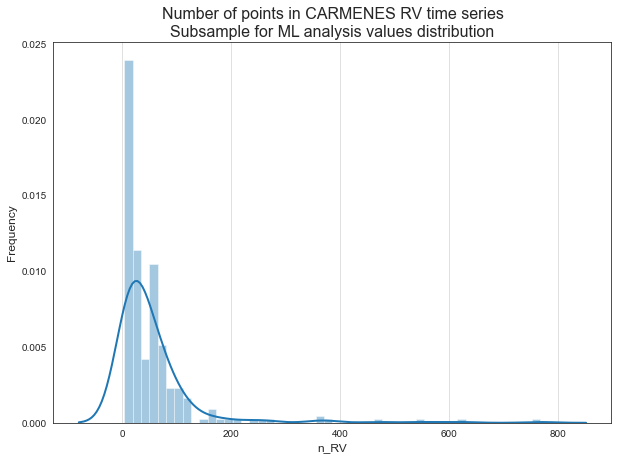

In [42]:
draw_hist(ml_rv_main_vars['n_RV'],
          "Number of points in CARMENES RV time series\nSubsample for ML analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_10_ML_SUBSAMPLE_RV_Number_of_points_distribution.png")

In [43]:
np.nanquantile(ml_rv_main_vars['n_RV'], q=0.95)

159.0

**OBSERVATION:**
- Most of the RV time series ($95\%$) have less than $\approx159$ points.

#### Sampling period analysis (RV - ML subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    282.000000
mean      18.008678
std       32.018035
min        0.003176
25%        3.936369
50%        9.949019
75%       20.991051
max      307.604864
Name: Ps_RV, dtype: float64
p = 3.98527e-79
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


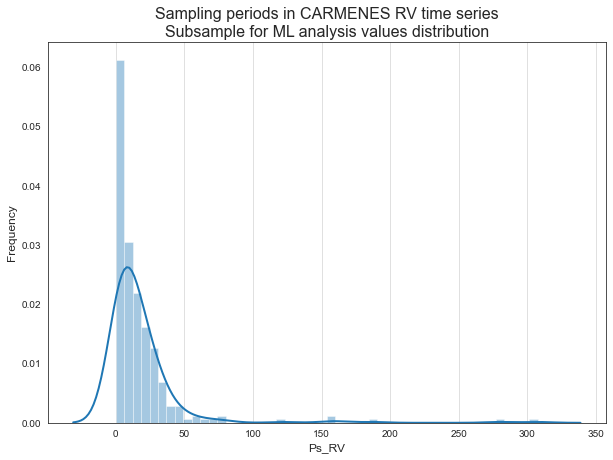

In [44]:
draw_hist(ml_rv_main_vars['Ps_RV'],
          "Sampling periods in CARMENES RV time series\nSubsample for ML analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_11_ML_SUBSAMPLE_RV_Sampling_period_distribution.png")

In [45]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.03)

0.9787316022440791

In [46]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.04)

1.0052504100371151

**OBSERVATION:**
- Most of the RV time series ($97\%$) have sampling periods greater than $\approx1$ day.

#### RMS analysis (RV - ML subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2.820000e+02
mean     1.832941e+00
std      1.278094e+00
min      3.687434e-07
25%      7.371487e-01
50%      1.675366e+00
75%      2.783865e+00
max      4.976458e+00
Name: rms_PG_RV, dtype: float64
p = 5.07366e-05
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


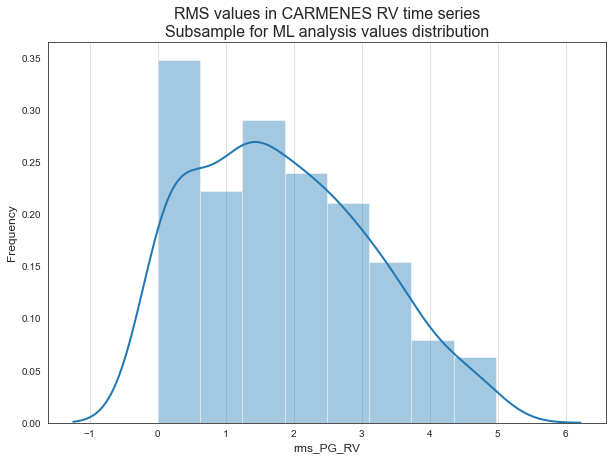

In [47]:
draw_hist(ml_rv_main_vars['rms_PG_RV'],
          "RMS values in CARMENES RV time series\nSubsample for ML analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_12_ML_SUBSAMPLE_RV_RMS_values_distribution.png")

In [48]:
np.nanquantile(ml_rv_main_vars['rms_PG_RV'], q=0.80)

2.9830431763638003

In [49]:
np.nanquantile(ml_rv_main_vars['rms_PG_RV'], q=0.81)

3.064821633108206

**OBSERVATION:**
- $80\%$ of the time series show RMS values (outliers removed) lower than $5\;m\;s^{-1}$.

# Summary

**OBSERVATIONS AND CONCLUSIONS:**
From the 390 objects (387 in practice, as 3 objects have empty RV files) of the CARMENES NZP-corrected RV time series, we have inspected the values of the more relevant variables:

- 265 objects for periodogram analysis (for them, both RV and _TESS_ periodograms are available).
- 286 objects for Machine Learning analysis (objects with RMS < 5 $ms^{-1}$).
